In [139]:
from urllib.request import urlopen, Request

In [140]:
from bs4 import BeautifulSoup

In [171]:
finviz_url = "https://finviz.com/quote.ashx?t="

In [172]:
tickers= ["MSFT", "TSLA", "NVDA"]

In [173]:
for ticker in tickers:
    url = finviz_url + ticker
    req= Request(url=url, headers= {"user-agent": "my-app"})
    # Now we're gonna take the "response" and throw it in in a beautifulsoup
    response = urlopen(req)
    html= BeautifulSoup(response, "html")
    news_table = html.find(id="news-table")
    news_tables[ticker]= news_table

In [174]:
# Now we're gonna take the "response" and throw it in in a beautifulsoup

In [177]:
data = news_tables["NVDA"]
nvda_rows = data.findAll("tr")
print(nvda_rows)

[<tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'Barrons.com', 'https://finance.yahoo.com/m/dfcf8260-c978-348f-a4be-dbe57ca9d2d0/nvidia-stock-rises.-how.html');">
<td align="right" width="130">
            Today 09:15AM
        </td>
<td align="left">
<div class="news-link-container">
<div class="news-link-left">
<a class="tab-link-news" href="https://finance.yahoo.com/m/dfcf8260-c978-348f-a4be-dbe57ca9d2d0/nvidia-stock-rises.-how.html" rel="nofollow" target="_blank">Nvidia Stock Rises. How TSMCs Earnings Could Help Shares.</a>
</div>
<div class="news-link-right">
<span>(Barrons.com)</span></div></div></td></tr>, <tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'Motley Fool', 'https://finance.yahoo.com/m/9d701cd6-24ac-397b-a2ac-9bd40a844f45/1-artificial-intelligence.html');">
<td align="right" width="130">
            08:45AM
        </td>
<td align="left">
<div class="news-link-container">
<div class="news-link-left">
<a class="tab-link-news

In [178]:
#The enumerate function gives me the index and the object of any list and iterates through evey single object
for  index, row in enumerate(nvda_rows):
    title = row.a.text #Look for the anchor tag for the text, in this case "a" inside the table row , and with this we get the text that's inside this anchor tag
    print(title)

Nvidia Stock Rises. How TSMCs Earnings Could Help Shares.
1 Artificial Intelligence (AI) Chip Stock to Buy the Dip Right Now (Hint: It's Not Nvidia)
AI Stocks: Tech Giants, Cloud Titans Face 'Show Me' Moment. Nvidia Earnings Loom.
Intels AI Chief to Leave Chip Maker in Wake of CEO Exit
Three reasons why Nvidia is underperforming the S&P 500 going into its earnings
3 reasons why Nvidia is underperforming the S&P 500 going into its earnings
Nvidia Stock Drops. What to Watch Today.
France Taps Nuclear Power in Race for AI Supremacy
3 No-Brainer Artificial Intelligence (AI) Stocks to Buy Right Now
Is Nvidia losing the faith of the bulls?
Nvidia stock slips amid report of OpenAI plan for AI chip development
Will AMD Be the Best Artificial Intelligence (AI) Stock of 2025?
Can This Unstoppable Stock Join Apple, Microsoft, Nvidia, Amazon, Alphabet, Meta Platforms, and Tesla in the $1 Trillion Club by 2035?
Nvidia and Apple Falls 6% as Meta Rockets 19% in Early 2025
Will Potential Tariffs on Ta

In [23]:
#We now have the text of every single title inside the news table!
#Now we want to get the date, timestamp, of everysingle row, or news article
#Basically, we are looking again for a new this time tag that contains the time stamp
#Here, if we look at the html of the relevant page, it is the td tag.
#So,

In [179]:
for index, row in enumerate(nvda_rows):
    title= row.a.text
    timestamp = row.td.text
    print(timestamp + " " + title)


            Today 09:15AM
         Nvidia Stock Rises. How TSMCs Earnings Could Help Shares.

            08:45AM
         1 Artificial Intelligence (AI) Chip Stock to Buy the Dip Right Now (Hint: It's Not Nvidia)

            07:50AM
         AI Stocks: Tech Giants, Cloud Titans Face 'Show Me' Moment. Nvidia Earnings Loom.

            07:48AM
         Intels AI Chief to Leave Chip Maker in Wake of CEO Exit

            07:27AM
         Three reasons why Nvidia is underperforming the S&P 500 going into its earnings

            07:27AM
         3 reasons why Nvidia is underperforming the S&P 500 going into its earnings

            07:26AM
         Nvidia Stock Drops. What to Watch Today.

            07:16AM
         France Taps Nuclear Power in Race for AI Supremacy

            07:15AM
         3 No-Brainer Artificial Intelligence (AI) Stocks to Buy Right Now

            07:09AM
         Is Nvidia losing the faith of the bulls?

            07:07AM
         Nvidia stock slips ami

In [26]:
#We've done good until now, but we've only tested our code for a specific example of the AMZN news table.
#Let's generalize

In [180]:
parsed_data = []
for ticker, news_table in news_tables.items():
    for row in news_table.findAll("tr"):
        title = row.a.text.strip()
        date_data = row.td.text.strip().split(" ") #splits the text with a space
        if len(date_data) == 1:
            time = date_data[0].strip() #So we split by space, and if there is one component we take it as it is...
        else: #But! If there are two components, we take the first one as the date and the second one as the time of the article.
            date = date_data[0].strip()
            time = date_data[1].strip()
        parsed_data.append([ticker, date, time, title]) #We're saying that if the date exists then go ahead and add that date and time in.
print(parsed_data)

#Χρησιμοποιώ παντού το .strip() για να σβήσω κενά τα οποία χωρίς αυτό εμφανίζονταν... και ήταν ΠΟΛΛΑ.

[['NVDA', 'Today', '09:15AM', 'Nvidia Stock Rises. How TSMCs Earnings Could Help Shares.'], ['NVDA', 'Today', '08:45AM', "1 Artificial Intelligence (AI) Chip Stock to Buy the Dip Right Now (Hint: It's Not Nvidia)"], ['NVDA', 'Today', '07:50AM', "AI Stocks: Tech Giants, Cloud Titans Face 'Show Me' Moment. Nvidia Earnings Loom."], ['NVDA', 'Today', '07:48AM', 'Intels AI Chief to Leave Chip Maker in Wake of CEO Exit'], ['NVDA', 'Today', '07:27AM', 'Three reasons why Nvidia is underperforming the S&P 500 going into its earnings'], ['NVDA', 'Today', '07:27AM', '3 reasons why Nvidia is underperforming the S&P 500 going into its earnings'], ['NVDA', 'Today', '07:26AM', 'Nvidia Stock Drops. What to Watch Today.'], ['NVDA', 'Today', '07:16AM', 'France Taps Nuclear Power in Race for AI Supremacy'], ['NVDA', 'Today', '07:15AM', '3 No-Brainer Artificial Intelligence (AI) Stocks to Buy Right Now'], ['NVDA', 'Today', '07:09AM', 'Is Nvidia losing the faith of the bulls?'], ['NVDA', 'Today', '07:07AM'

In [45]:
#Now we're gonna run the sentiment analysis using nltk vader.

In [112]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

In [181]:
df = pd.DataFrame(parsed_data, columns = ["ticker", "date", "time", "title"])
df.head()

,ticker,date,time,title
0,NVDA,Today,09:15AM,Nvidia Stock Rises. How TSMCs Earnings Could H...
1,NVDA,Today,08:45AM,1 Artificial Intelligence (AI) Chip Stock to B...
2,NVDA,Today,07:50AM,"AI Stocks: Tech Giants, Cloud Titans Face 'Sho..."
3,NVDA,Today,07:48AM,Intels AI Chief to Leave Chip Maker in Wake of...
4,NVDA,Today,07:27AM,Three reasons why Nvidia is underperforming th...


In [182]:
vader = SentimentIntensityAnalyzer()

In [183]:
print(vader.polarity_scores("I hate you with all my heart, and i want you to die today"))

{'neg': 0.425, 'neu': 0.503, 'pos': 0.073, 'compound': -0.8074}


In [184]:
print(vader.polarity_scores("hate"))

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}


In [185]:
print(vader.polarity_scores("love"))

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}


In [186]:
print(df["title"])

0      Nvidia Stock Rises. How TSMCs Earnings Could H...
1      1 Artificial Intelligence (AI) Chip Stock to B...
2      AI Stocks: Tech Giants, Cloud Titans Face 'Sho...
3      Intels AI Chief to Leave Chip Maker in Wake of...
4      Three reasons why Nvidia is underperforming th...
                             ...                        
295    Tesla Sales Plunge 59% in Germany to Lowest Le...
296    Tesla, Inc. (TSLA) Faces Declining Registratio...
297    Tesla eclipsed by Chinese electric car rival a...
298    Chinese rival overtakes Tesla as Britain turns...
299    Tesla sales in Germany decline, furthering wea...
Name: title, Length: 300, dtype: object


In [187]:
f= lambda title: vader.polarity_scores(title)["compound"] 
#We create a lambda expression where we apply the polarity scores function on the title and keep only the compound values produced.
#Then, we are gonna .apply(f), apply f function on our titles on the df dataset and create a new column called "compound"
df["compound"] = df["title"].apply(f)

print(df.head())

  ticker   date     time                                              title  \
0   NVDA  Today  09:15AM  Nvidia Stock Rises. How TSMCs Earnings Could H...   
1   NVDA  Today  08:45AM  1 Artificial Intelligence (AI) Chip Stock to B...   
2   NVDA  Today  07:50AM  AI Stocks: Tech Giants, Cloud Titans Face 'Sho...   
3   NVDA  Today  07:48AM  Intels AI Chief to Leave Chip Maker in Wake of...   
4   NVDA  Today  07:27AM  Three reasons why Nvidia is underperforming th...   

   compound  
0    0.5994  
1    0.4767  
2   -0.2263  
3   -0.0516  
4    0.0000  


In [188]:
df["compound"].mean()

0.11401166666666666

In [189]:
p= lambda title: vader.polarity_scores(title)["pos"]
df["positive"] = df["title"].apply(p)
n = lambda title: vader.polarity_scores(title)["neg"]
df["negative"] = df["title"].apply(n)

In [190]:
df.head()

,ticker,date,time,title,compound,positive,negative
0,NVDA,Today,09:15AM,Nvidia Stock Rises. How TSMCs Earnings Could H...,0.5994,0.412,0.000
1,NVDA,Today,08:45AM,1 Artificial Intelligence (AI) Chip Stock to B...,0.4767,0.181,0.000
2,NVDA,Today,07:50AM,"AI Stocks: Tech Giants, Cloud Titans Face 'Sho...",-0.2263,0.000,0.137
3,NVDA,Today,07:48AM,Intels AI Chief to Leave Chip Maker in Wake of...,-0.0516,0.000,0.098
4,NVDA,Today,07:27AM,Three reasons why Nvidia is underperforming th...,0.0000,0.000,0.000


In [191]:
import seaborn as sns

In [192]:
import matplotlib as plt

In [193]:
%matplotlib inline

In [197]:
from datetime import datetime, timedelta 
# Fix "Today" and "Yesterday"
df["date"] = df["date"].replace({
    "Today": datetime.today().strftime("2025-02-10"),
})

df["date"] = pd.to_datetime(df["date"], errors="coerce", format="mixed").dt.date

In [198]:
mean_df = df.groupby(["ticker", "date"]).mean("compound")
print(mean_df)

                   compound  positive  negative
ticker date                                    
MSFT   2025-02-05  0.160407  0.145533  0.059667
       2025-02-06  0.052026  0.121348  0.078043
       2025-02-07  0.153249  0.121000  0.036200
       2025-02-08  0.275309  0.123727  0.000000
       2025-02-09  0.161111  0.130333  0.068222
       2025-02-10  0.163071  0.101000  0.010857
NVDA   2025-02-07  0.147261  0.127789  0.045658
       2025-02-08  0.189628  0.111556  0.019778
       2025-02-09  0.182040  0.148733  0.049933
       2025-02-10  0.159755  0.151310  0.054517
TSLA   2025-02-05  0.033363  0.056813  0.040438
       2025-02-06  0.028883  0.109083  0.082042
       2025-02-07 -0.012803  0.081433  0.095133
       2025-02-08 -0.051760  0.074400  0.103200
       2025-02-09  0.257600  0.099000  0.000000
       2025-02-10  0.118050  0.128750  0.083687


In [199]:
mean_df = mean_df.unstack()
mean_df = mean_df.xs("compound", axis="columns").transpose()

In [200]:
mean_df

ticker,MSFT,NVDA,TSLA
date,,,
2025-02-05,0.160407,NaN,0.033363
2025-02-06,0.052026,NaN,0.028883
2025-02-07,0.153249,0.147261,-0.012803
2025-02-08,0.275309,0.189628,-0.051760
2025-02-09,0.161111,0.182040,0.257600
2025-02-10,0.163071,0.159755,0.118050


In [201]:
import matplotlib.pyplot as plt
%matplotlib inline

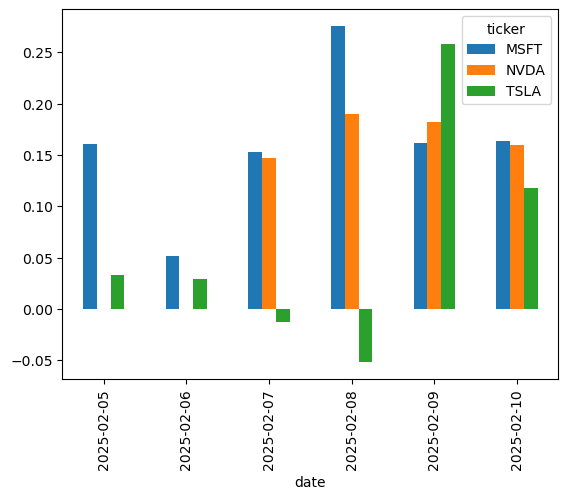

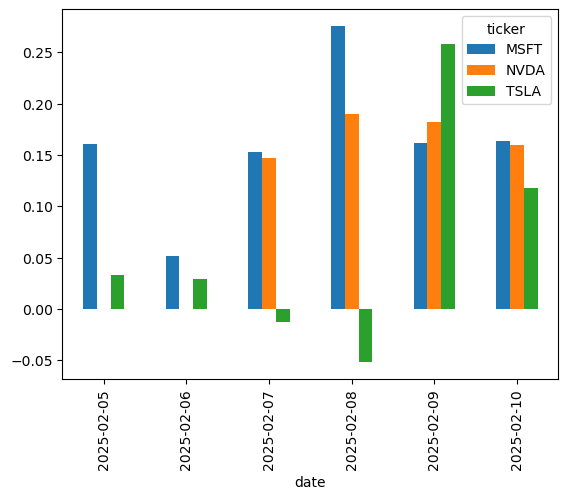

In [206]:
mean_df.plot(kind="bar")
plt.show()